**Predictions**

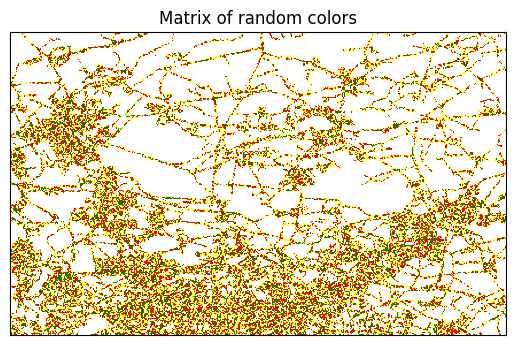

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from shared.utils.mask import load_mask

# Parameters
H_r = rows   # number of rows
W_r = cols   # number of columns

# Define allowed colors
colors = ["white", "yellow", "red", "green"]

# Create random matrix with color indices
matrix = np.random.randint(0, len(colors), size=(H_r, W_r))



matrix[static_crop[0] == 0] = 0

# Create a custom color map
cmap = mcolors.ListedColormap(colors)

# Visualization
plt.imshow(matrix, cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.title("Matrix of random colors")
plt.show()


**LBCS map**

In [ ]:
import json
import folium
import numpy as np


# color map 
LBCS_COLOR_MAP = {
    "1000": "#FFFF00",  # yellow
    "2000": "#FF0000",  # red
    "3000": "#A020F0",  # purple
    "4000": "#BEBEBE",  # gray
    "5000": "#90EE90",  # light green
    "6000": "#0000FF",  # blue
    "7000": "#008B8B",  # dark cyan
    "8000": "#551A8B",  # purple4
    "9000": "#228B22",   # forest green
    "0000": "#FFFFFF"   # White
}

# load enriched grid
grid_path = r"C:\Users\user\UPM\Imperial-4año\IoT\Github\hugging_face\BERLIN_reduced\\grid_first_level.geojson"
with open(grid_path, "r") as f:
    grid = json.load(f)


# Compute map center from first polygon to avoid scanning everything
first_coords = grid["features"][0]["geometry"]["coordinates"][0]
lats = [pt[1] for pt in first_coords]
lons = [pt[0] for pt in first_coords]
center = (sum(lats) / len(lats), sum(lons) / len(lons))

m = folium.Map(location=center, zoom_start=12)

for feat in grid["features"]:
    code = feat["properties"].get("lbcs_first_level", "0000")
    color = LBCS_COLOR_MAP.get(code, "#ffffff")

    folium.GeoJson(
        feat,
        style_function=lambda f, col=color: {
            "fillColor": col,
            "color": "#00000000",
            "weight": 0.3,
            "fillOpacity": 0.7,
        }
    ).add_to(m)

m